## Extracting mfcc feaure vectors from .wav files

In [1]:
import scipy.io.wavfile as wav
import numpy as np 
import pandas as pd
import matplotlib as plt
from python_speech_features import mfcc
import wave
import os
%matplotlib inline

In [2]:
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.frombuffer(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.frombuffer(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result

In [3]:
def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(str(file))
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

In [4]:
data=[]
labels=[]
mainpath = r'../cracklesinputsplit/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files_output/'
for foldername in ['coarse','fine','healthy'] : 
    for filename in os.listdir(mainpath+foldername):
        if (filename.endswith(".wav")):
            print("type: " + foldername + " file: " + filename)
            rate, sampwidth, array=readwav(mainpath+foldername+"/"+filename)
            data.append(mfcc(array,rate).flatten())
            labels.append(foldername)
        else:
            continue

type: coarse file: 146_8p3_Ar_mc_AKGC417L4.wav
type: coarse file: 166_1p1_Ll_sc_Meditron8.wav
type: coarse file: 186_2b2_Lr_mc_AKGC417L1.wav
type: coarse file: 186_2b2_Lr_mc_AKGC417L0.wav
type: coarse file: 166_1p1_Ll_sc_Meditron9.wav
type: coarse file: 146_8p3_Ar_mc_AKGC417L5.wav
type: coarse file: 138_1p3_Ll_mc_AKGC417L4.wav
type: coarse file: 186_2b2_Lr_mc_AKGC417L2.wav
type: coarse file: 186_2b2_Lr_mc_AKGC417L3.wav
type: coarse file: 146_8p3_Ar_mc_AKGC417L6.wav


type: coarse file: 146_8p3_Ar_mc_AKGC417L2.wav
type: coarse file: 138_1p3_Ll_mc_AKGC417L1.wav
type: coarse file: 138_1p3_Ll_mc_AKGC417L0.wav
type: coarse file: 146_8p3_Ar_mc_AKGC417L3.wav
type: coarse file: 128_1b3_Tc_mc_LittC2SE0.wav
type: coarse file: 146_8p3_Ar_mc_AKGC417L1.wav
type: coarse file: 128_1b3_Tc_mc_LittC2SE2.wav
type: coarse file: 138_1p3_Ll_mc_AKGC417L2.wav
type: coarse file: 186_2b2_Lr_mc_AKGC417L4.wav


type: coarse file: 106_2b1_Pl_mc_LittC2SE8.wav
type: coarse file: 138_1p3_Ll_mc_AKGC417L3.wav
type: coarse file: 128_1b3_Tc_mc_LittC2SE3.wav
type: coarse file: 166_1p1_Ll_sc_Meditron10.wav
type: coarse file: 166_1p1_Ll_sc_Meditron11.wav
type: coarse file: 205_1b3_Pl_mc_AKGC417L4.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L9.wav
type: coarse file: 150_1b2_Al_sc_Meditron8.wav
type: coarse file: 166_1p1_Ll_sc_Meditron13.wav
type: coarse file: 166_1p1_Ll_sc_Meditron12.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L8.wav


type: coarse file: 154_3b3_Ll_mc_AKGC417L3.wav
type: coarse file: 205_1b3_Pl_mc_AKGC417L3.wav
type: coarse file: 150_1b2_Al_sc_Meditron10.wav
type: coarse file: 166_1p1_Ll_sc_Meditron17.wav
type: coarse file: 205_1b3_Pl_mc_AKGC417L2.wav
type: coarse file: 154_3b3_Ll_mc_AKGC417L2.wav
type: coarse file: 154_3b3_Ll_mc_AKGC417L0.wav
type: coarse file: 166_1p1_Ll_sc_Meditron14.wav
type: coarse file: 205_1b3_Pl_mc_AKGC417L1.wav
type: coarse file: 154_3b3_Ll_mc_AKGC417L1.wav


type: coarse file: 203_1p2_Ar_mc_AKGC417L3.wav
type: coarse file: 150_1b2_Al_sc_Meditron2.wav
type: coarse file: 150_1b2_Al_sc_Meditron3.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L2.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L0.wav
type: coarse file: 150_1b2_Al_sc_Meditron1.wav
type: coarse file: 150_1b2_Al_sc_Meditron0.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L1.wav


type: coarse file: 203_1p2_Ar_mc_AKGC417L5.wav
type: coarse file: 177_1b2_Pl_mc_AKGC417L3.wav
type: coarse file: 177_1b2_Pl_mc_AKGC417L2.wav
type: coarse file: 150_1b2_Al_sc_Meditron5.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L4.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L6.wav
type: coarse file: 150_1b2_Al_sc_Meditron7.wav
type: coarse file: 177_1b2_Pl_mc_AKGC417L0.wav
type: coarse file: 150_1b2_Al_sc_Meditron6.wav


type: coarse file: 177_1b2_Pl_mc_AKGC417L1.wav
type: coarse file: 203_1p2_Ar_mc_AKGC417L7.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L5.wav
type: coarse file: 166_1p1_Ll_sc_Meditron1.wav
type: coarse file: 176_1b3_Ar_mc_AKGC417L3.wav


type: coarse file: 106_2b1_Pl_mc_LittC2SE5.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE4.wav
type: coarse file: 176_1b3_Ar_mc_AKGC417L2.wav
type: coarse file: 166_1p1_Ll_sc_Meditron0.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L4.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L6.wav
type: coarse file: 166_1p1_Ll_sc_Meditron2.wav
type: coarse file: 176_1b3_Ar_mc_AKGC417L0.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE6.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE7.wav


type: coarse file: 176_1b3_Ar_mc_AKGC417L1.wav
type: coarse file: 166_1p1_Ll_sc_Meditron3.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L7.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L3.wav
type: coarse file: 166_1p1_Ll_sc_Meditron7.wav
type: coarse file: 176_1b3_Ar_mc_AKGC417L5.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE3.wav
type: coarse file: 176_1b3_Ar_mc_AKGC417L4.wav
type: coarse file: 166_1p1_Ll_sc_Meditron6.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L2.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L0.wav


type: coarse file: 166_1p1_Ll_sc_Meditron4.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE0.wav
type: coarse file: 106_2b1_Pl_mc_LittC2SE1.wav
type: coarse file: 166_1p1_Ll_sc_Meditron5.wav
type: coarse file: 133_2p2_Pl_mc_AKGC417L1.wav
type: fine file: 173_1b1_Al_sc_Meditron7.wav
type: fine file: 223_1b1_Ll_sc_Meditron5.wav
type: fine file: 109_1b1_Ll_sc_Litt32006.wav
type: fine file: 109_1b1_Ll_sc_Litt32007.wav
type: fine file: 223_1b1_Ll_sc_Meditron4.wav
type: fine file: 173_1b1_Al_sc_Meditron4.wav
type: fine file: 222_1b1_Lr_sc_Meditron18.wav
type: fine file: 223_1b1_Ll_sc_Meditron6.wav


type: fine file: 222_1b1_Lr_sc_Meditron9.wav
type: fine file: 109_1b1_Ll_sc_Litt32005.wav
type: fine file: 109_1b1_Ll_sc_Litt32004.wav
type: fine file: 223_1b1_Ll_sc_Meditron7.wav
type: fine file: 223_1b1_Ll_sc_Meditron3.wav
type: fine file: 109_1b1_Ll_sc_Litt32000.wav
type: fine file: 109_1b1_Ll_sc_Litt32001.wav
type: fine file: 223_1b1_Ll_sc_Meditron2.wav
type: fine file: 173_1b1_Al_sc_Meditron2.wav
type: fine file: 223_1b1_Ll_sc_Meditron0.wav
type: fine file: 109_1b1_Ll_sc_Litt32003.wav
type: fine file: 109_1b1_Ll_sc_Litt32002.wav
type: fine file: 157_1b1_Lr_sc_Meditron0.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE4.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE6.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE7.wav
type: fine file: 109_1b1_Lr_sc_Litt32004.wav
type: fine file: 141_1b1_Pr_mc_LittC2SE1.wav


type: fine file: 109_1b1_Lr_sc_Litt32005.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE6.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE7.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE5.wav
type: fine file: 157_1b1_Lr_sc_Meditron1.wav
type: fine file: 157_1b1_Lr_sc_Meditron3.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE7.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE5.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE4.wav
type: fine file: 109_1b1_Lr_sc_Litt32007.wav
type: fine file: 109_1b1_Lr_sc_Litt32006.wav
type: fine file: 141_1b1_Pr_mc_LittC2SE2.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE5.wav


type: fine file: 132_2b2_Lr_mc_LittC2SE4.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE6.wav
type: fine file: 157_1b1_Lr_sc_Meditron6.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE1.wav
type: fine file: 109_1b1_Lr_sc_Litt32002.wav
type: fine file: 109_1b1_Lr_sc_Litt32003.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE0.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE1.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE3.wav
type: fine file: 157_1b1_Lr_sc_Meditron7.wav
type: fine file: 157_1b1_Lr_sc_Meditron5.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE1.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE3.wav


type: fine file: 142_1b1_Pl_mc_LittC2SE2.wav
type: fine file: 109_1b1_Lr_sc_Litt32001.wav
type: fine file: 141_1b1_Pr_mc_LittC2SE4.wav
type: fine file: 109_1b1_Lr_sc_Litt32000.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE3.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE2.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE0.wav
type: fine file: 157_1b1_Lr_sc_Meditron4.wav
type: fine file: 129_1b1_Ar_sc_Meditron1.wav


type: fine file: 129_1b1_Ar_sc_Meditron0.wav
type: fine file: 129_1b1_Ar_sc_Meditron2.wav
type: fine file: 129_1b1_Ar_sc_Meditron3.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE9.wav
type: fine file: 142_1b1_Pl_mc_LittC2SE8.wav
type: fine file: 132_2b2_Lr_mc_LittC2SE8.wav
type: fine file: 129_1b1_Ar_sc_Meditron6.wav
type: fine file: 132_2b1_Lr_mc_LittC2SE8.wav


type: fine file: 129_1b1_Ar_sc_Meditron4.wav
type: fine file: 129_1b1_Ar_sc_Meditron5.wav
type: fine file: 222_1b1_Lr_sc_Meditron12.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE2.wav
type: fine file: 110_1p1_Lr_sc_Meditron1.wav
type: fine file: 216_1b1_Al_sc_Meditron3.wav
type: fine file: 222_1b1_Lr_sc_Meditron2.wav
type: fine file: 216_1b1_Al_sc_Meditron2.wav
type: fine file: 110_1p1_Lr_sc_Meditron0.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE3.wav
type: fine file: 222_1b1_Lr_sc_Meditron13.wav
type: fine file: 222_1b1_Lr_sc_Meditron11.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE1.wav
type: fine file: 110_1p1_Lr_sc_Meditron2.wav
type: fine file: 216_1b1_Al_sc_Meditron0.wav


type: fine file: 222_1b1_Lr_sc_Meditron0.wav
type: fine file: 110_1p1_Lr_sc_Meditron3.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE0.wav
type: fine file: 222_1b1_Lr_sc_Meditron10.wav
type: fine file: 173_1b1_Al_sc_Meditron8.wav
type: fine file: 222_1b1_Lr_sc_Meditron14.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE4.wav
type: fine file: 222_1b1_Lr_sc_Meditron5.wav
type: fine file: 216_1b1_Al_sc_Meditron4.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE5.wav
type: fine file: 110_1p1_Lr_sc_Meditron6.wav
type: fine file: 222_1b1_Lr_sc_Meditron15.wav


type: fine file: 173_1b1_Al_sc_Meditron9.wav
type: fine file: 110_1p1_Lr_sc_Meditron4.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE7.wav
type: fine file: 223_1b1_Ll_sc_Meditron9.wav
type: fine file: 222_1b1_Lr_sc_Meditron7.wav
type: fine file: 223_1b1_Ll_sc_Meditron8.wav
type: fine file: 199_2b3_Ll_mc_LittC2SE6.wav
type: fine file: 110_1p1_Lr_sc_Meditron5.wav
type: fine file: 222_1b1_Lr_sc_Meditron16.wav
type: healthy file: 173_1b1_Al_sc_Meditron6.wav
type: healthy file: 128_1b3_Tc_mc_LittC2SE4.wav


type: healthy file: 146_8p3_Ar_mc_AKGC417L7.wav
type: healthy file: 199_2b3_Ll_mc_LittC2SE8.wav
type: healthy file: 216_1b1_Al_sc_Meditron9.wav
type: healthy file: 222_1b1_Lr_sc_Meditron8.wav
type: healthy file: 216_1b1_Al_sc_Meditron8.wav
type: healthy file: 222_1b1_Lr_sc_Meditron19.wav
type: healthy file: 173_1b1_Al_sc_Meditron5.wav
type: healthy file: 173_1b1_Al_sc_Meditron1.wav
type: healthy file: 128_1b3_Tc_mc_LittC2SE1.wav
type: healthy file: 173_1b1_Al_sc_Meditron0.wav
type: healthy file: 223_1b1_Ll_sc_Meditron1.wav
type: healthy file: 146_8p3_Ar_mc_AKGC417L0.wav


type: healthy file: 133_2p2_Pl_mc_AKGC417L8.wav
type: healthy file: 173_1b1_Al_sc_Meditron3.wav
type: healthy file: 129_1b1_Ar_sc_Meditron8.wav
type: healthy file: 205_1b3_Pl_mc_AKGC417L5.wav
type: healthy file: 150_1b2_Al_sc_Meditron16.wav
type: healthy file: 141_1b1_Pr_mc_LittC2SE0.wav
type: healthy file: 154_3b3_Ll_mc_AKGC417L4.wav
type: healthy file: 150_1b2_Al_sc_Meditron15.wav
type: healthy file: 150_1b2_Al_sc_Meditron14.wav
type: healthy file: 150_1b2_Al_sc_Meditron9.wav
type: healthy file: 157_1b1_Lr_sc_Meditron2.wav


type: healthy file: 216_1b1_Al_sc_Meditron10.wav
type: healthy file: 132_2b1_Lr_mc_LittC2SE2.wav
type: healthy file: 173_1b1_Al_sc_Meditron11.wav
type: healthy file: 132_2b2_Lr_mc_LittC2SE0.wav
type: healthy file: 166_1p1_Ll_sc_Meditron16.wav
type: healthy file: 150_1b2_Al_sc_Meditron11.wav
type: healthy file: 173_1b1_Al_sc_Meditron10.wav
type: healthy file: 216_1b1_Al_sc_Meditron11.wav
type: healthy file: 173_1b1_Al_sc_Meditron12.wav
type: healthy file: 205_1b3_Pl_mc_AKGC417L0.wav


type: healthy file: 150_1b2_Al_sc_Meditron13.wav
type: healthy file: 166_1p1_Ll_sc_Meditron15.wav
type: healthy file: 150_1b2_Al_sc_Meditron12.wav
type: healthy file: 166_1p1_Ll_sc_Meditron19.wav
type: healthy file: 166_1p1_Ll_sc_Meditron24.wav
type: healthy file: 166_1p1_Ll_sc_Meditron18.wav
type: healthy file: 157_1b1_Lr_sc_Meditron8.wav
type: healthy file: 150_1b2_Al_sc_Meditron4.wav
type: healthy file: 129_1b1_Ar_sc_Meditron7.wav
type: healthy file: 166_1p1_Ll_sc_Meditron23.wav
type: healthy file: 166_1p1_Ll_sc_Meditron22.wav
type: healthy file: 166_1p1_Ll_sc_Meditron20.wav
type: healthy file: 166_1p1_Ll_sc_Meditron21.wav
type: healthy file: 222_1b1_Lr_sc_Meditron3.wav
type: healthy file: 222_1b1_Lr_sc_Meditron1.wav
type: healthy file: 216_1b1_Al_sc_Meditron1.wav
type: healthy file: 216_1b1_Al_sc_Meditron5.wav


type: healthy file: 222_1b1_Lr_sc_Meditron4.wav
type: healthy file: 106_2b1_Pl_mc_LittC2SE2.wav
type: healthy file: 146_8p3_Ar_mc_AKGC417L8.wav
type: healthy file: 222_1b1_Lr_sc_Meditron17.wav
type: healthy file: 216_1b1_Al_sc_Meditron6.wav
type: healthy file: 222_1b1_Lr_sc_Meditron6.wav
type: healthy file: 216_1b1_Al_sc_Meditron7.wav


In [5]:
np.shape(data[0])

(6487,)

In [6]:
imdb = pd.DataFrame(data)
imdb

,0,1,2,3,4,5,6,7,8,9,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
0,34.917549,-3.858365,18.246266,15.630791,13.893676,12.383696,11.012900,9.110135,6.228418,0.596141,...,16.403676,10.582820,7.761226,4.706020,5.974146,0.747226,-3.174705,-1.870042,3.697145,1.935691
1,14.398851,-2.088956,3.757570,3.292767,5.046319,3.872308,4.152778,4.211547,4.070683,3.522499,...,9.140956,7.387423,6.308072,21.651175,13.323444,4.362455,0.559899,0.048405,-5.436337,-10.123583
2,40.678844,-10.915309,2.715091,0.044837,4.084884,2.565776,4.306243,2.135678,2.452819,2.184558,...,14.607872,9.351454,-1.427000,-8.382047,-0.428349,1.860702,9.538362,13.003057,9.606843,8.042990
3,40.215212,-14.953709,-3.295916,-7.618410,-4.078508,-6.693443,-4.742618,-6.668534,-5.326952,-4.983521,...,11.525686,12.646225,-1.690058,0.510182,-7.160004,-11.550228,-3.324286,-1.052483,14.394218,6.000675
4,15.032449,-2.226887,3.461997,2.660216,4.168735,3.087718,3.321865,2.770348,2.025587,0.736662,...,9.882621,10.106723,9.815173,8.830841,9.762976,9.881895,6.409894,6.421490,2.706795,2.108538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,35.532680,-7.559180,7.241895,3.923008,5.283971,5.973623,7.206432,3.920321,3.313757,4.865420,...,2.151594,8.069103,14.865135,17.644940,13.921441,7.036578,0.334567,-11.679994,-2.855572,8.413008
248,18.686388,-3.768020,1.771473,0.758231,2.200359,1.860930,2.546789,2.669855,3.568966,3.685982,...,14.620458,20.065893,5.364670,6.757193,11.662696,16.396936,5.144851,2.990475,15.920798,6.756522
249,30.970865,-0.819788,18.892231,7.129279,9.210690,7.610422,6.396662,7.110187,2.660202,-0.880139,...,-1.407905,6.798141,13.332804,21.590788,17.996740,2.399348,-6.893947,-8.464213,3.467718,10.902942
250,14.573488,-2.238147,4.302279,3.415899,3.375494,2.186641,5.818417,5.879612,7.035950,7.115241,...,11.097725,13.302454,12.346346,-0.377471,5.521645,10.127021,-5.125027,0.555512,2.366742,10.134277


In [7]:
imdb.insert(loc=0, column='label', value=labels)

In [8]:
imdb

,label,0,1,2,3,4,5,6,7,8,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
0,coarse,34.917549,-3.858365,18.246266,15.630791,13.893676,12.383696,11.012900,9.110135,6.228418,...,16.403676,10.582820,7.761226,4.706020,5.974146,0.747226,-3.174705,-1.870042,3.697145,1.935691
1,coarse,14.398851,-2.088956,3.757570,3.292767,5.046319,3.872308,4.152778,4.211547,4.070683,...,9.140956,7.387423,6.308072,21.651175,13.323444,4.362455,0.559899,0.048405,-5.436337,-10.123583
2,coarse,40.678844,-10.915309,2.715091,0.044837,4.084884,2.565776,4.306243,2.135678,2.452819,...,14.607872,9.351454,-1.427000,-8.382047,-0.428349,1.860702,9.538362,13.003057,9.606843,8.042990
3,coarse,40.215212,-14.953709,-3.295916,-7.618410,-4.078508,-6.693443,-4.742618,-6.668534,-5.326952,...,11.525686,12.646225,-1.690058,0.510182,-7.160004,-11.550228,-3.324286,-1.052483,14.394218,6.000675
4,coarse,15.032449,-2.226887,3.461997,2.660216,4.168735,3.087718,3.321865,2.770348,2.025587,...,9.882621,10.106723,9.815173,8.830841,9.762976,9.881895,6.409894,6.421490,2.706795,2.108538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,healthy,35.532680,-7.559180,7.241895,3.923008,5.283971,5.973623,7.206432,3.920321,3.313757,...,2.151594,8.069103,14.865135,17.644940,13.921441,7.036578,0.334567,-11.679994,-2.855572,8.413008
248,healthy,18.686388,-3.768020,1.771473,0.758231,2.200359,1.860930,2.546789,2.669855,3.568966,...,14.620458,20.065893,5.364670,6.757193,11.662696,16.396936,5.144851,2.990475,15.920798,6.756522
249,healthy,30.970865,-0.819788,18.892231,7.129279,9.210690,7.610422,6.396662,7.110187,2.660202,...,-1.407905,6.798141,13.332804,21.590788,17.996740,2.399348,-6.893947,-8.464213,3.467718,10.902942
250,healthy,14.573488,-2.238147,4.302279,3.415899,3.375494,2.186641,5.818417,5.879612,7.035950,...,11.097725,13.302454,12.346346,-0.377471,5.521645,10.127021,-5.125027,0.555512,2.366742,10.134277


## Creating test and train datasets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df = imdb.copy()
df

,label,0,1,2,3,4,5,6,7,8,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
0,coarse,34.917549,-3.858365,18.246266,15.630791,13.893676,12.383696,11.012900,9.110135,6.228418,...,16.403676,10.582820,7.761226,4.706020,5.974146,0.747226,-3.174705,-1.870042,3.697145,1.935691
1,coarse,14.398851,-2.088956,3.757570,3.292767,5.046319,3.872308,4.152778,4.211547,4.070683,...,9.140956,7.387423,6.308072,21.651175,13.323444,4.362455,0.559899,0.048405,-5.436337,-10.123583
2,coarse,40.678844,-10.915309,2.715091,0.044837,4.084884,2.565776,4.306243,2.135678,2.452819,...,14.607872,9.351454,-1.427000,-8.382047,-0.428349,1.860702,9.538362,13.003057,9.606843,8.042990
3,coarse,40.215212,-14.953709,-3.295916,-7.618410,-4.078508,-6.693443,-4.742618,-6.668534,-5.326952,...,11.525686,12.646225,-1.690058,0.510182,-7.160004,-11.550228,-3.324286,-1.052483,14.394218,6.000675
4,coarse,15.032449,-2.226887,3.461997,2.660216,4.168735,3.087718,3.321865,2.770348,2.025587,...,9.882621,10.106723,9.815173,8.830841,9.762976,9.881895,6.409894,6.421490,2.706795,2.108538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,healthy,35.532680,-7.559180,7.241895,3.923008,5.283971,5.973623,7.206432,3.920321,3.313757,...,2.151594,8.069103,14.865135,17.644940,13.921441,7.036578,0.334567,-11.679994,-2.855572,8.413008
248,healthy,18.686388,-3.768020,1.771473,0.758231,2.200359,1.860930,2.546789,2.669855,3.568966,...,14.620458,20.065893,5.364670,6.757193,11.662696,16.396936,5.144851,2.990475,15.920798,6.756522
249,healthy,30.970865,-0.819788,18.892231,7.129279,9.210690,7.610422,6.396662,7.110187,2.660202,...,-1.407905,6.798141,13.332804,21.590788,17.996740,2.399348,-6.893947,-8.464213,3.467718,10.902942
250,healthy,14.573488,-2.238147,4.302279,3.415899,3.375494,2.186641,5.818417,5.879612,7.035950,...,11.097725,13.302454,12.346346,-0.377471,5.521645,10.127021,-5.125027,0.555512,2.366742,10.134277


In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=25) # Set random state to a particular number to gt reproducable results

In [12]:
train

,label,0,1,2,3,4,5,6,7,8,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
220,healthy,39.562312,-8.944029,5.084657,2.783401,6.276218,4.942115,6.171333,3.845505,4.013430,...,5.478420,-1.290531,-2.979268,2.927749,4.736807,-0.841298,-3.858712,-0.906032,-0.345808,1.426114
70,coarse,33.925792,-4.404966,14.476428,7.884340,6.763284,1.990677,-4.488400,-3.277052,-6.355320,...,28.169687,25.240807,24.535987,17.586925,11.989647,1.707577,0.534027,4.972953,2.238217,2.952048
94,fine,16.861957,-3.322241,2.099245,1.882468,3.332421,2.093779,3.267523,3.953860,4.408856,...,26.775518,16.208808,-10.783676,2.587276,23.121801,12.533359,-9.955394,4.499142,17.171807,10.482199
111,fine,30.316495,-6.352898,8.836138,6.142789,7.718981,7.698844,8.928207,4.969487,1.925748,...,13.042009,15.587176,13.160099,7.022995,4.073710,2.053445,3.819928,7.693764,10.597632,14.394684
32,coarse,35.885117,-17.596000,21.516876,-8.575644,21.901122,-7.057727,22.545343,2.122588,3.689658,...,14.318486,14.519802,17.063262,15.997009,11.106873,12.492773,10.879822,8.072836,9.880006,8.037056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,coarse,37.094750,-9.421532,6.482325,2.552884,2.837238,0.428013,6.736610,-1.467236,0.038374,...,10.445415,4.328152,-0.921920,9.455073,17.540174,22.504843,19.101627,17.735495,10.555739,3.646818
143,fine,10.763580,-6.452079,-5.357850,15.085164,24.287620,34.547482,-32.048061,21.415570,11.725436,...,0.719038,-7.653972,-14.520988,-22.092830,-23.985395,-14.244089,-0.515561,4.283634,1.217113,0.441054
218,healthy,34.715854,-9.940484,3.754925,1.102913,4.625349,3.772881,5.386158,3.020062,3.451889,...,19.836798,20.007384,14.848990,22.570546,24.203589,14.910698,4.879575,-7.257191,-1.707515,12.358873
62,coarse,33.114673,-12.785187,6.502567,4.865350,3.330682,5.264463,9.709844,8.276418,0.940733,...,14.713148,12.770894,6.278801,3.697120,5.767663,2.923263,-0.694062,-10.145267,-3.023514,-2.125706


In [13]:
train = train.reset_index().drop('index', axis=1)
train

,label,0,1,2,3,4,5,6,7,8,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
0,healthy,39.562312,-8.944029,5.084657,2.783401,6.276218,4.942115,6.171333,3.845505,4.013430,...,5.478420,-1.290531,-2.979268,2.927749,4.736807,-0.841298,-3.858712,-0.906032,-0.345808,1.426114
1,coarse,33.925792,-4.404966,14.476428,7.884340,6.763284,1.990677,-4.488400,-3.277052,-6.355320,...,28.169687,25.240807,24.535987,17.586925,11.989647,1.707577,0.534027,4.972953,2.238217,2.952048
2,fine,16.861957,-3.322241,2.099245,1.882468,3.332421,2.093779,3.267523,3.953860,4.408856,...,26.775518,16.208808,-10.783676,2.587276,23.121801,12.533359,-9.955394,4.499142,17.171807,10.482199
3,fine,30.316495,-6.352898,8.836138,6.142789,7.718981,7.698844,8.928207,4.969487,1.925748,...,13.042009,15.587176,13.160099,7.022995,4.073710,2.053445,3.819928,7.693764,10.597632,14.394684
4,coarse,35.885117,-17.596000,21.516876,-8.575644,21.901122,-7.057727,22.545343,2.122588,3.689658,...,14.318486,14.519802,17.063262,15.997009,11.106873,12.492773,10.879822,8.072836,9.880006,8.037056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,coarse,37.094750,-9.421532,6.482325,2.552884,2.837238,0.428013,6.736610,-1.467236,0.038374,...,10.445415,4.328152,-0.921920,9.455073,17.540174,22.504843,19.101627,17.735495,10.555739,3.646818
197,fine,10.763580,-6.452079,-5.357850,15.085164,24.287620,34.547482,-32.048061,21.415570,11.725436,...,0.719038,-7.653972,-14.520988,-22.092830,-23.985395,-14.244089,-0.515561,4.283634,1.217113,0.441054
198,healthy,34.715854,-9.940484,3.754925,1.102913,4.625349,3.772881,5.386158,3.020062,3.451889,...,19.836798,20.007384,14.848990,22.570546,24.203589,14.910698,4.879575,-7.257191,-1.707515,12.358873
199,coarse,33.114673,-12.785187,6.502567,4.865350,3.330682,5.264463,9.709844,8.276418,0.940733,...,14.713148,12.770894,6.278801,3.697120,5.767663,2.923263,-0.694062,-10.145267,-3.023514,-2.125706


In [14]:
test = test.reset_index().drop('index', axis=1)
test

,label,0,1,2,3,4,5,6,7,8,...,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486
0,fine,31.762388,-9.720009,5.234283,2.898046,8.510427,8.641431,11.430376,10.692486,10.826534,...,16.238037,15.041483,13.776579,17.554600,20.576438,14.917068,10.364130,7.973805,5.095045,1.862046
1,healthy,16.204787,-2.484275,2.484999,2.645979,5.488097,3.052118,1.785856,3.436200,4.795373,...,18.362108,7.469421,-3.698310,17.084622,2.622908,-2.872842,-4.559579,-5.384309,0.741982,4.977526
2,coarse,39.928640,-5.657293,12.610065,11.085621,8.515456,7.844146,6.781436,1.559672,5.520077,...,14.271063,6.920578,6.188868,12.397997,4.119032,3.734928,2.476034,-4.091935,-3.115195,-1.541917
3,healthy,14.966213,-2.794678,3.460485,3.585060,5.582068,4.729465,4.897409,4.665954,4.766833,...,14.797858,11.101429,6.224034,5.263672,3.664494,-3.429021,-3.980825,4.537010,-1.167949,-2.466393
4,healthy,37.000351,-6.551874,8.609376,6.652706,10.447201,8.437888,8.976226,6.062613,5.221239,...,7.234524,7.551354,12.087841,18.872700,21.368978,8.152827,-4.923019,-7.294643,2.234783,13.824386
5,fine,36.844279,-13.006484,-0.816555,-4.486558,-1.821415,-3.637685,-2.822949,-5.102736,-4.506831,...,8.757972,8.307975,4.231065,5.883835,4.834731,4.531474,3.782334,1.959455,2.071442,2.683004
6,coarse,15.032449,-2.226887,3.461997,2.660216,4.168735,3.087718,3.321865,2.770348,2.025587,...,9.882621,10.106723,9.815173,8.830841,9.762976,9.881895,6.409894,6.421490,2.706795,2.108538
7,fine,33.047460,-5.004874,12.082373,7.838956,9.583649,9.936480,7.140268,7.165195,5.770913,...,7.954910,5.397642,11.246885,0.512168,5.378787,4.703221,-4.149412,8.619704,-3.212603,5.551336
8,fine,11.223272,1.346696,7.440829,8.073003,11.623605,10.254420,5.924166,2.317359,2.641069,...,17.319737,20.102897,6.539901,-0.120221,-5.776715,0.785802,-4.872399,-2.602899,-1.542238,-14.323395
9,healthy,39.235409,-12.115948,0.613175,-2.289113,1.081696,-0.086994,1.588713,-0.264977,0.328715,...,5.888792,10.015732,6.848418,4.940450,5.525511,4.725918,1.712192,4.376074,1.307028,1.847792


## One Hot Encoding Labels

In [15]:
train_labels = train['label']
train_labels=pd.DataFrame(train_labels)
train_labels

,label
0,healthy
1,coarse
2,fine
3,fine
4,coarse
...,...
196,coarse
197,fine
198,healthy
199,coarse


In [16]:
val_labels = test['label']
val_labels=pd.DataFrame(val_labels)
val_labels

,label
0,fine
1,healthy
2,coarse
3,healthy
4,healthy
5,fine
6,coarse
7,fine
8,fine
9,healthy


In [17]:
a=[]
p = val_labels.copy()
a = p['label'].apply(lambda x: [1,0,] if x=='coarse' else([0,1] if x=='fine' else([0,0])))
y_val = pd.DataFrame(list(a))
y_val

,0,1
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0
5,0,1
6,1,0
7,0,1
8,0,1
9,0,0


In [18]:
b = []
m = train_labels.copy()
b = m['label'].apply(lambda x: [1,0,] if x=='coarse' else([0,1] if x=='fine' else([0,0])))
y_train = pd.DataFrame(list(b))
y_train

,0,1
0,0,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
196,1,0
197,0,1
198,0,0
199,1,0


In [19]:
x_train = train.drop('label', axis=1)
x_train = x_train.values.reshape(201,499,13,1)

In [20]:
x_val = test.drop('label', axis=1)
x_val = x_val.values.reshape(51,499,13,1)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_val.fit(x_val)

### CNN Model

In [25]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
import tensorflow as tf
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape=(499, 13, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# 2nd Convolution layer
model.add(Conv2D(64, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(2 , activation='softmax'))

In [34]:
initial_learning_rate = 0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0,
    staircase=True
)
#optimizer = Adam(learning_rate=lr_schedule)

optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)


In [35]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 499, 13, 32)       832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 499, 13, 32)       128       
_________________________________________________________________
activation_7 (Activation)    (None, 499, 13, 32)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 249, 6, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 249, 6, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 249, 6, 64)        51264     
_________________________________________________________________
batch_normalization_8 (Batch (None, 249, 6, 64)       

In [36]:
batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch = 5,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = 1,
    epochs=15,
)

Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 4s 829ms/step - loss: 0.7537 - accuracy: 0.4964 - val_loss: 0.5792 - val_accuracy: 0.6562
Epoch 2/15
5/5 [==============================] - 2s 408ms/step - loss: 0.5602 - accuracy: 0.5839 - val_loss: 2.8429 - val_accuracy: 0.6250
Epoch 3/15
5/5 [==============================] - 2s 420ms/step - loss: 0.6645 - accuracy: 0.5839 - val_loss: 3.4695 - val_accuracy: 0.6562
Epoch 4/15
5/5 [==============================] - 2s 413ms/step - loss: 0.6073 - accuracy: 0.5985 - val_loss: 1.2547 - val_accuracy: 0.4688
Epoch 5/15
5/5 [==============================] - 3s 581ms/step - loss: 0.6074 - accuracy: 0.6125 - val_loss: 0.8297 - val_accuracy: 0.7500
Epoch 6/15
5/5 [==============================] - 3s 658ms/step - loss: 0.6028 - accuracy: 0.6642 - val_loss: 4.7662 - val_accuracy: 0.6250
Epoch 7/15
5/5 [==============================] - 2s 420ms/step - loss: 0.5930 - accuracy: 0.6277 - val_loss: 1.5031 - v

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

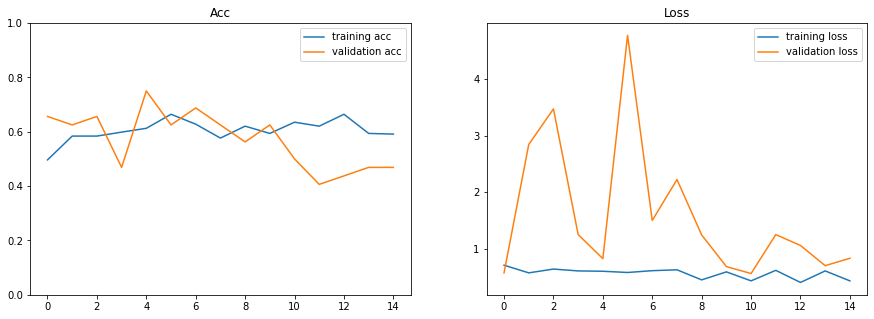

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,1])
plt.title('Acc')
plt.plot(history.history['accuracy'], label = 'training acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title('Loss')